<a href="https://colab.research.google.com/github/TienLungSun/PyTorch-deep-learning/blob/main/2.2.%20Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


# Generate data

In [3]:
# y without noises 
lstX=[]
lstY=[]
for i in range(5000):
  x1 = np.random.normal(0.5, 0.3) # mean and standard deviation
  x2 = np.random.normal(0, 0.3)
  x3 = np.random.normal(0.8, 0.5)
  x4 = np.random.normal(0.3, 0.8)
  x5 = np.random.normal(0.6, 0.5)
  x6 = np.random.normal(0.5, 0.3)
  x7 = np.random.normal(0, 0.6)
  # y = 0.323*x1^2 + 0.586*x1x2 + 0.4*x3 + 0.8972x5^3 + 0.267*x3^2x5x6 + 0.78*x7^2
  y = 0.323*pow(x1,2)+0.586*x1*x2+0.4*x3+0.8972*pow(x5,3)+0.267*pow(x3,2)*x5*x6+0.78*pow(x7,2)
  lstX.append([x1, x2, x3, x4, x5, x6, x7])
  lstY.append([y])

In [4]:
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(np.max(numpyY), np.min(numpyY), np.mean(numpyY), np.std(numpyY))

11.469512733935593 -1.4331148131014237 1.4060138795175565 1.1800812547771011


In [5]:
# Add noises to y
lstX=[]
lstY=[]
for i in range(5000):
  x1 = np.random.normal(0.5, 0.3) # mean and standard deviation
  x2 = np.random.normal(0, 0.3)
  x3 = np.random.normal(0.8, 0.5)
  x4 = np.random.normal(0.3, 0.8)
  x5 = np.random.normal(0.6, 0.5)
  x6 = np.random.normal(0.5, 0.3)
  x7 = np.random.normal(0, 0.6)
  # y = 0.323*x1^2 + 0.586*x1x2 + 0.4*x3 + 0.8972x5^3 + 0.267*x3^2x5x6 + 0.78*x7^2
  y = 0.323*pow(x1,2)+0.586*x1*x2+0.4*x3+0.8972*pow(x5,3)+0.267*pow(x3,2)*x5*x6+0.78*pow(x7,2)
  y = y +  np.random.normal(2, 3)
  lstX.append([x1, x2, x3, x4, x5, x6, x7])
  lstY.append([y])

In [6]:
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(np.max(numpyY), np.min(numpyY), np.mean(numpyY), np.std(numpyY))

17.649863367916048 -8.154578495001708 3.4096858495555775 3.2074221476272022


# Build NN

In [7]:
MyNet = nn.Sequential(
    nn.Linear(7, 1024),
    nn.ReLU(),
    nn.Linear(1024, 1024),
    nn.ReLU(),
    nn.Linear(1024, 1024),
    nn.ReLU(),
    nn.Linear(1024, 1024),
    nn.ReLU(),
    nn.Linear(1024, 1024),
    nn.ReLU(),
    nn.Linear(1024, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=7, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1024, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1024, out_features=1024, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=1024, bias=True)
  (7): ReLU()
  (8): Linear(in_features=1024, out_features=1024, bias=True)
  (9): ReLU()
  (10): Linear(in_features=1024, out_features=1, bias=True)
)


In [8]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.0003)

# Prepare mini-batch data loader

In [9]:
trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
tensorX = torch.FloatTensor(trainX).to(device)
tensorY = torch.FloatTensor(trainY).to(device)
torch_dataset = Data.TensorDataset(tensorX, tensorY)
loader = Data.DataLoader(
      dataset=torch_dataset,  
      batch_size=500,      
      shuffle=True,       
      num_workers=0,    # subprocesses for loading data
  )

# Training Loop

In [10]:
lossLst = []
for epoch in range(1, 1000):
  if(epoch% 200 == 0):
      print(epoch, end=",")
  for (batchX, batchY) in loader:
    batchY_hat = MyNet(batchX)
    loss = loss_func(batchY_hat, batchY)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

200,400,600,800,

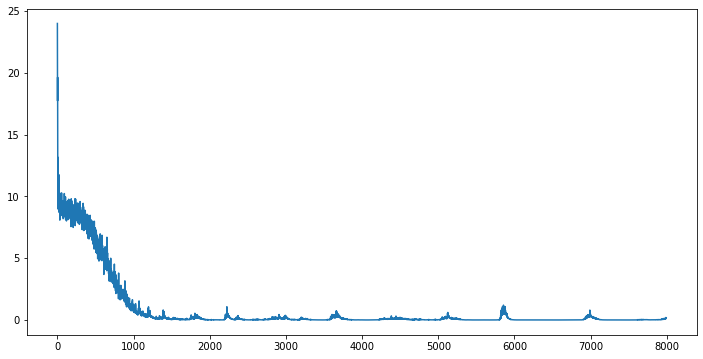

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

# Test to check generalized prediction performance

In [12]:
tensorX = torch.FloatTensor(testX).to(device)
tensorY = torch.FloatTensor(testY).to(device)
tensorY_hat = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)), end = ", ")

14.49, 

# Run training-test N times to collect performance data

In [15]:
test_lossLst = []
for i in range(1, 21):
  print("\nTrain-test ", i, end= " ")
  trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
  torch_dataset = Data.TensorDataset(tensorX, tensorY)
  loader = Data.DataLoader(
      dataset=torch_dataset,  
      batch_size=500,      
      shuffle=True,       
      num_workers=0,    # subprocesses for loading data
  )

  # initialize NN weights
  for name, param in MyNet.named_parameters():
    if(param.requires_grad):
      torch.nn.init.normal_(param, mean=0.0, std=0.02)

  # train NN 
  print("epoch", end=": ")
  for epoch in range(1, 300):
    if(epoch%100 == 0):
      print(epoch, end=",")
    for (batchX, batchY) in loader:
      batchY_hat = MyNet(batchX)
      loss = loss_func(batchY_hat, batchY)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  tensorX = torch.FloatTensor(testX).to(device)
  tensorY = torch.FloatTensor(testY).to(device)
  tensorY_hat = MyNet(tensorX)
  loss = loss_func(tensorY, tensorY_hat)
  test_lossLst.append(float(loss))


Train-test  1 epoch: 100,200,
Train-test  2 epoch: 100,200,
Train-test  3 epoch: 100,200,
Train-test  4 epoch: 100,200,
Train-test  5 epoch: 100,200,
Train-test  6 epoch: 100,200,
Train-test  7 epoch: 100,200,
Train-test  8 epoch: 100,200,
Train-test  9 epoch: 100,200,
Train-test  10 epoch: 100,200,
Train-test  11 epoch: 100,200,
Train-test  12 epoch: 100,200,
Train-test  13 epoch: 100,200,
Train-test  14 epoch: 100,200,
Train-test  15 epoch: 100,200,
Train-test  16 epoch: 100,200,
Train-test  17 epoch: 100,200,
Train-test  18 epoch: 100,200,
Train-test  19 epoch: 100,200,
Train-test  20 epoch: 100,200,

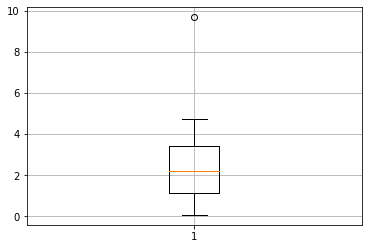

In [16]:
#take a look at the performance
plt.boxplot(test_lossLst)
plt.grid()